In [34]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)


1.12.0


In [56]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [57]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))


Training entries: 25000, labels: 25000


In [107]:
print(train_data[0])


[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [59]:
len(train_data[0]), len(train_data[1])


(218, 189)

In [137]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
# print(word_index)
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

def encode_review(text):
    text = text.split(' ')
    encoded_text = []
    for i in text:
        encoded_text.append(word_index.get(i, 2))
    return encoded_text

# print(encode_review("This was a horrible movie"))


[2, 16, 6, 527, 20]


In [118]:
print(decode_review(train_data[3]))

print(train_labels[3])
# print(decode_review(test_data[1]))

print(test_labels[0])
print(test_labels[1])
print(test_labels[7])


twenty first century to hang out in <UNK> but he is raised on the western <UNK> among a <UNK> speaking community br br yet there is a deeper conflict within him he <UNK> to know the truth the truth behind his <UNK> ancient stories where does fiction end and he wants to know the truth behind the death of his parents br br he is pulled to make a last <UNK> journey to the <UNK> of one of <UNK> most <UNK> mountains can the truth be told or is it all in stories br br in this story about stories we <UNK> bloody battles <UNK> lovers the <UNK> of old and the sometimes more <UNK> <UNK> of accepted truth in doing so we each connect with <UNK> as he lives the story of his own life br br <UNK> the <UNK> <UNK> is probably the most honest <UNK> and genuinely beautiful film of scotland ever made like <UNK> i got slightly annoyed with the <UNK> of hanging stories on more stories but also like <UNK> i <UNK> this once i saw the <UNK> picture ' forget the box office <UNK> of braveheart and its like you m

In [62]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)


In [63]:
len(train_data[0]), len(train_data[1])


(256, 256)

In [64]:
print(train_data[0])


[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [65]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [67]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [68]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 45us/step - loss: 0.6920 - acc: 0.5063 - val_loss: 0.6903 - val_acc: 0.5230
Epoch 2/40
15000/15000 [==============================] - 0s 13us/step - loss: 0.6861 - acc: 0.6035 - val_loss: 0.6817 - val_acc: 0.6702
Epoch 3/40
15000/15000 [==============================] - 0s 13us/step - loss: 0.6723 - acc: 0.6931 - val_loss: 0.6645 - val_acc: 0.7117
Epoch 4/40
15000/15000 [==============================] - 0s 13us/step - loss: 0.6479 - acc: 0.7541 - val_loss: 0.6372 - val_acc: 0.7417
Epoch 5/40
15000/15000 [==============================] - 0s 13us/step - loss: 0.6119 - acc: 0.7864 - val_loss: 0.5990 - val_acc: 0.7864
Epoch 6/40
15000/15000 [==============================] - 0s 13us/step - loss: 0.5670 - acc: 0.8135 - val_loss: 0.5554 - val_acc: 0.8131
Epoch 7/40
15000/15000 [==============================] - 0s 14us/step - loss: 0.5174 - acc: 0.8382 - val_loss: 0.5104 - val_acc

In [75]:
val_loss, val_acc = model.evaluate(test_data, test_labels)

print(val_loss, val_acc)

25000/25000 [==============================] - 0s 12us/step
0.33642614294052126 0.87092


In [70]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

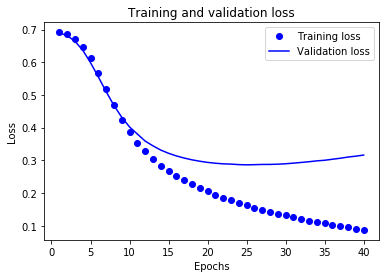

In [73]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


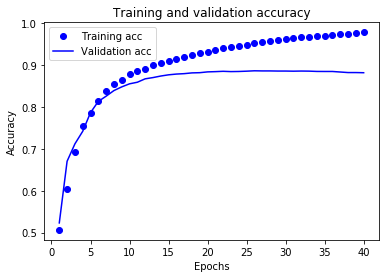

In [74]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [76]:
model.save('movie_review.model')

In [77]:
new_model = tf.keras.models.load_model('movie_review.model')

/anaconda3/envs/keras_tf/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [154]:
new_reviews = [encode_review("this was the worst movie I've ever seen. I could not believe how horrible it was. 0/10 terrible experience"), encode_review("I enjoyed this movie so much"), encode_review("it was ok")]
new_reviews = keras.preprocessing.sequence.pad_sequences(new_reviews,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
new_pred = new_model.predict([new_reviews])
print("custom:", new_pred)


predictions = new_model.predict([test_data[0:1]])
print("test_data", predictions)

custom: [[0.05630423]
 [0.7057229 ]
 [0.5281438 ]]
test_data [[0.0734168]]


In [120]:
import numpy as np
print(np.argmax(predictions[0]))

0


In [99]:
print(decode_review(test_data[0]))

<START> please give this one a miss br br <UNK> <UNK> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite <UNK> so all you madison fans give this a miss <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA